In [6]:
USEFULL_COLUMNS = ["duration","actors0","actors1","actors2","genre0","genre1","production_company",
                   "writer","date_published","budget_adj","budget","worlwide_gross_income","usa_gross_income",
                   "income_adj","title","language","year","country"]
data_model = data[USEFULL_COLUMNS]

data_model = data_model[data_model["year"]>=2000]

In [7]:
#create conviniet df for analysis
income_by_genre0 = data_model.groupby("genre0") \
                    .agg(mean_income=("income_adj","mean")) \
                    .sort_values("mean_income",ascending=False)

income_by_language = data_model.groupby("language") \
                    .agg(mean_income=("income_adj","mean"),
                        amount=("income_adj","count")) \
                    .sort_values("mean_income",ascending=False)
income_by_company = data_model.groupby("production_company")\
                    .agg(mean_income=("income_adj","mean"),
                        amount=("income_adj","count")) \
                    .sort_values("mean_income",ascending=False)
income_by_actors = data_model.groupby("actors0")\
                    .agg(mean_income=("income_adj","mean"),amount=("income_adj","count")) \
                    .sort_values("mean_income",ascending=False)


In [44]:
print("Amount of unique categorical values:")
print("Actors:",len(income_by_actors.index))
print("Language:",len(income_by_language.index))
print("Genre:",len(income_by_genre0.index))
print("Companies:",len(income_by_company.index))

Amount of unique categorical values:
Actors: 3210
Language: 67
Genre: 19
Companies: 2852


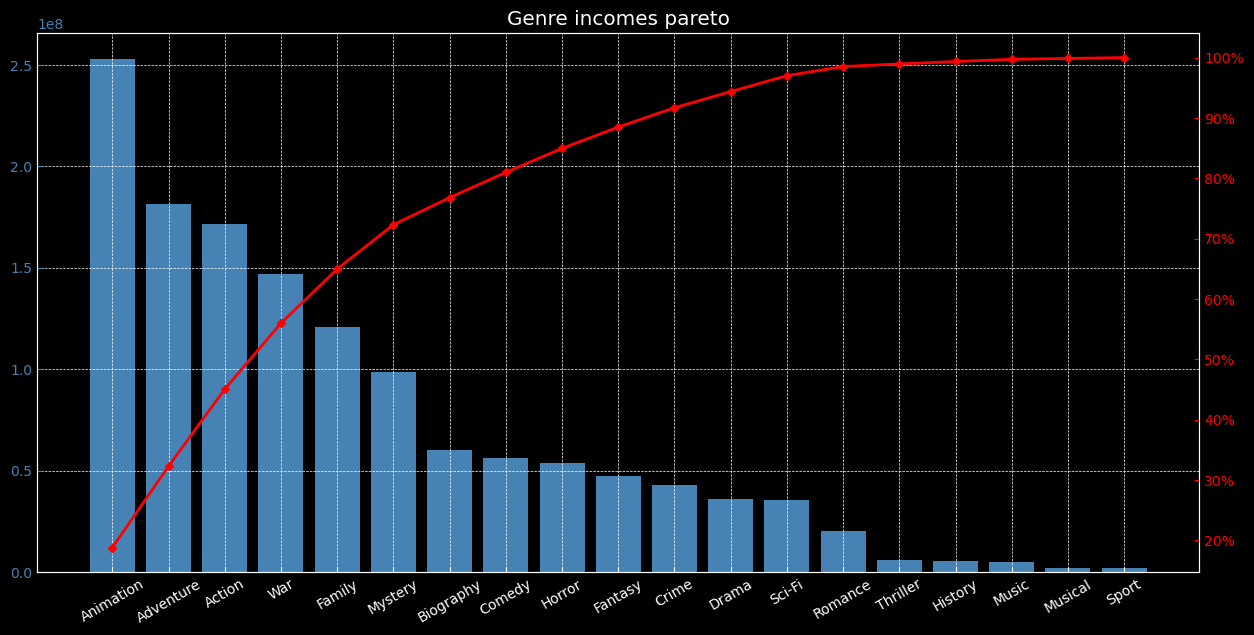

Categories covering 70%: ['Animation' 'Adventure' 'Action' 'War' 'Family']


In [43]:
def plot_pareto(X,col,threshold=70):
    new_col = "cum_percent"
    X[new_col] = X[col].cumsum() / X[col].sum()*100
    axis_threshold = X[X[new_col]<=70].index
    color1 = "red"
    color2 = "steelblue"
    line_size = 4
    
    fig,ax = plt.subplots(figsize=(15,7))
    ax.bar(X.index,X[col],color=color2)
    
    ax2 = ax.twinx()
    ax2.plot(X.index,X[new_col],color=color1,marker="D",ms=line_size)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y",colors=color2)
    ax.tick_params(axis="x",labelrotation=30)
    ax2.tick_params(axis="y",colors=color1,grid_alpha=0)
    ax.set_title("Genre incomes pareto")
    plt.show()
    print(f'Categories covering {threshold}%: {axis_threshold.values}')
    
plot_pareto(income_by_genre0,"mean_income")

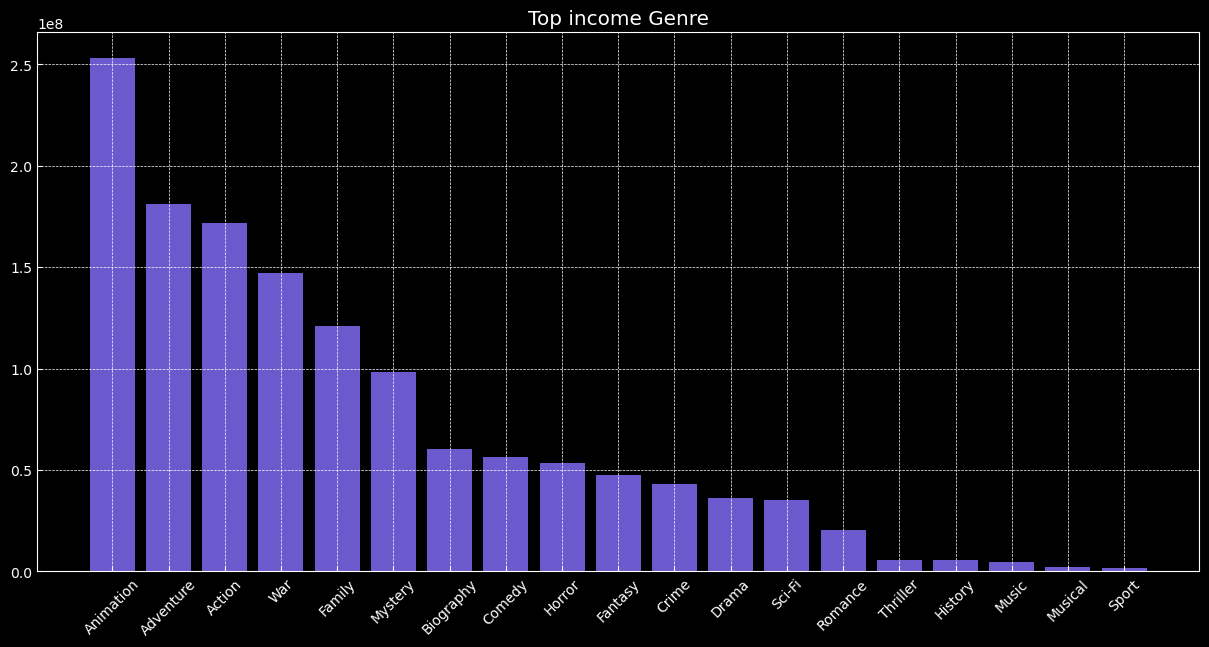

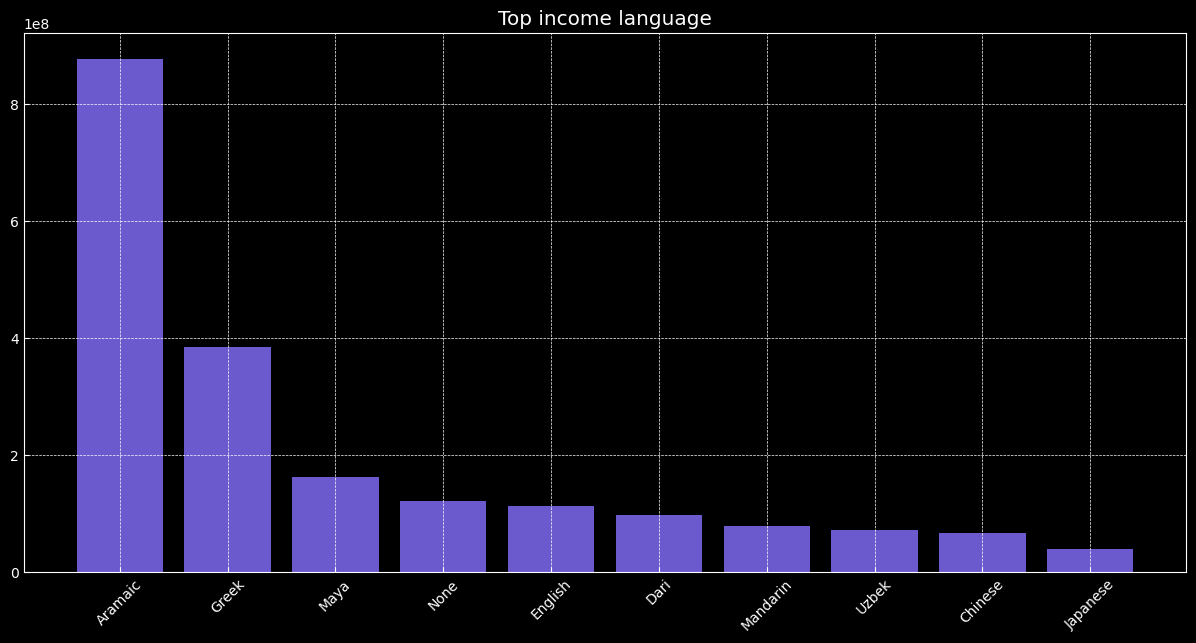

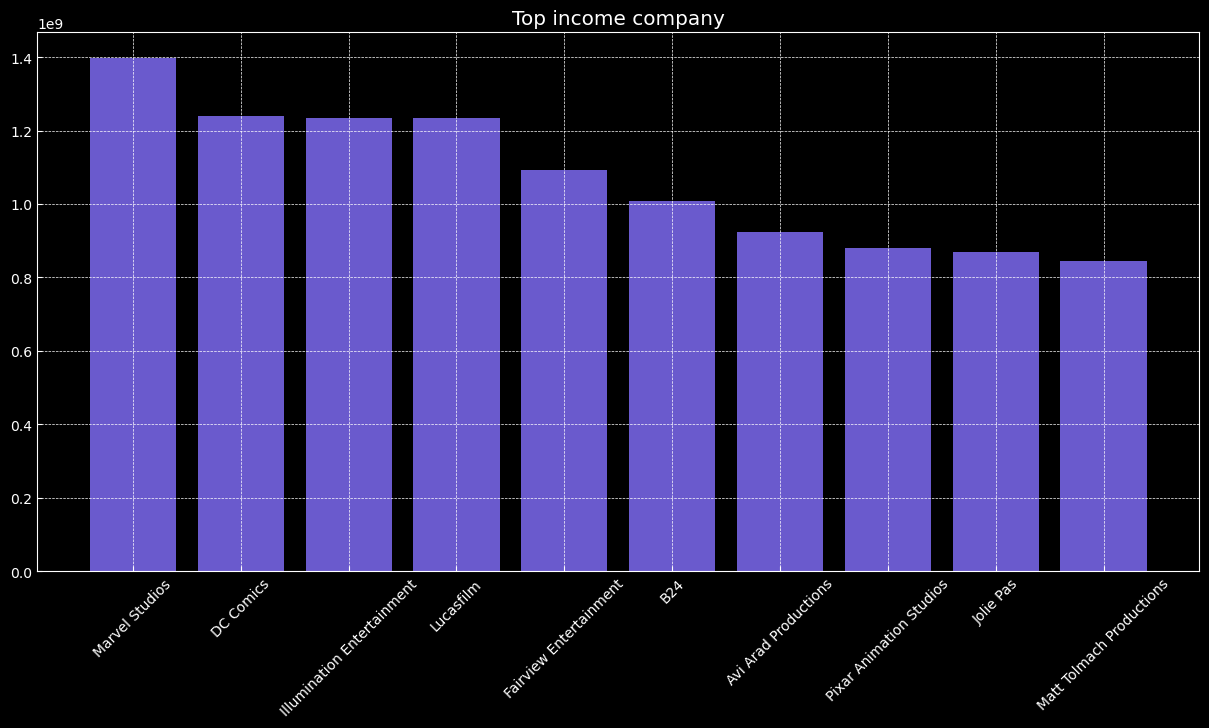

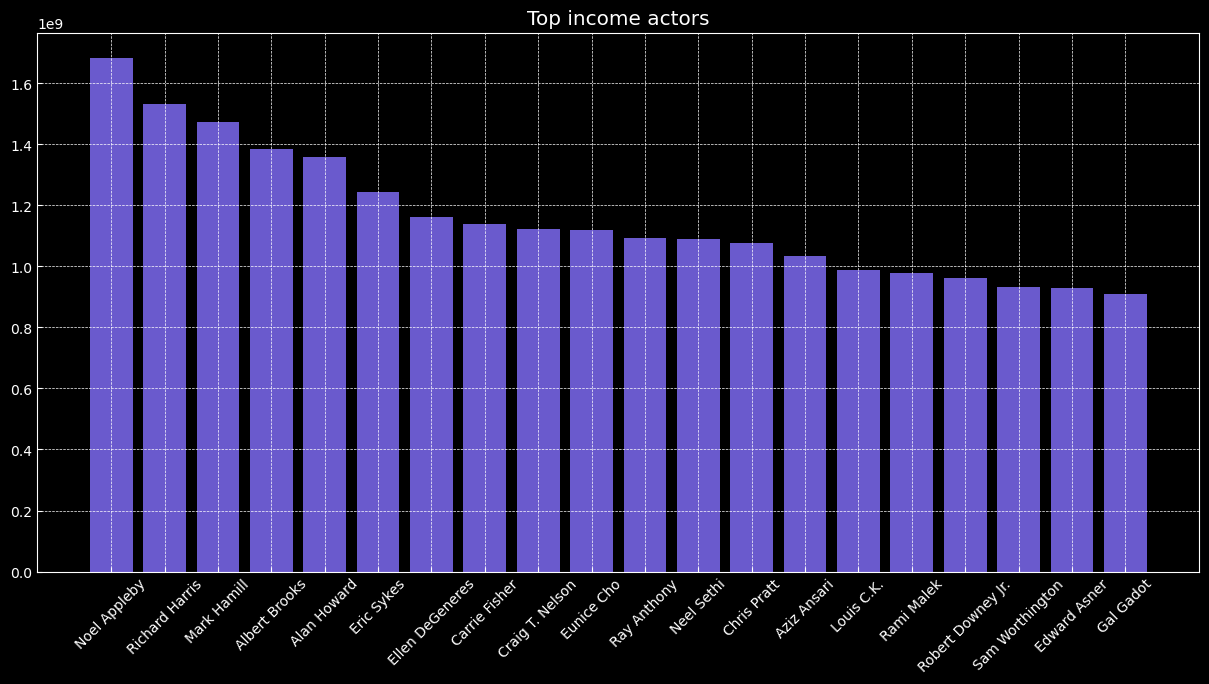

In [45]:
def income_by_categorical(data,column,title=None):
    fig,ax = plt.subplots(figsize=(15,7))
    ax.bar(x=data.index,height=data[column],color="slateblue")
    ax.tick_params(axis="x",rotation=45)
    if title:
        plt.title(title)
    plt.show()


income_by_categorical(income_by_genre0,"mean_income",title="Top income Genre")
income_by_categorical(income_by_language[:10],"mean_income",title="Top income language")
income_by_categorical(income_by_company[:10],"mean_income",title="Top income company")
income_by_categorical(income_by_actors[:20],"mean_income",title="Top income actors")


### There are strange income values for languages that are not popular at all, if we include the amount of movies in the analysis, the situation is clarify

In [46]:
income_by_language["money_ratio"] = income_by_language["mean_income"] / income_by_language["amount"]
language_short_list = income_by_language[income_by_language.amount>10].sort_values("amount",ascending=False)[0:10]
print(language_short_list)

            mean_income  amount    money_ratio
language                                      
English    1.129238e+08    4860   23235.344763
Spanish    8.795143e+06     179   49134.876229
Russian    8.891467e+06     179   49673.002564
Mandarin   7.919967e+07     107  740183.830878
French     2.045623e+07      92  222350.293087
Korean     1.863289e+07      87  214171.135869
Turkish    6.868632e+06      86   79867.814998
Japanese   4.029502e+07      70  575643.112786
Hindi      1.634387e+07      61  267932.226753
Cantonese  2.846666e+07      44  646969.637043


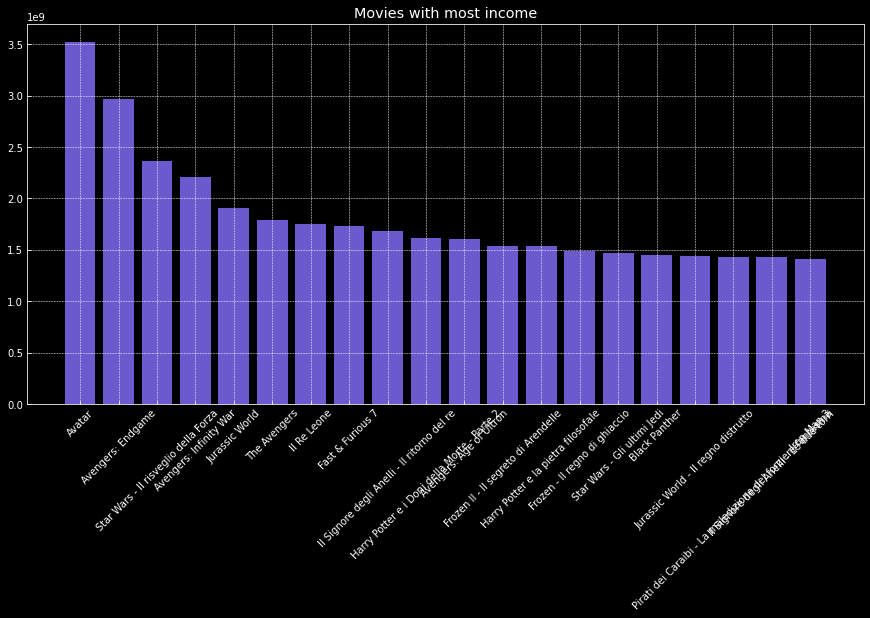

In [11]:
movie_income_sorted = data_model.sort_values("income_adj",ascending=False)

fig,ax = plt.subplots(figsize=(15,7))
ax.bar(x=movie_income_sorted[0:20]["title"],height=movie_income_sorted["income_adj"][0:20],color="slateblue")
ax.tick_params(axis="x",rotation=45)
plt.title("Movies with most income")
plt.show()

### The distribution of the budget and the income is clearly positive skewed

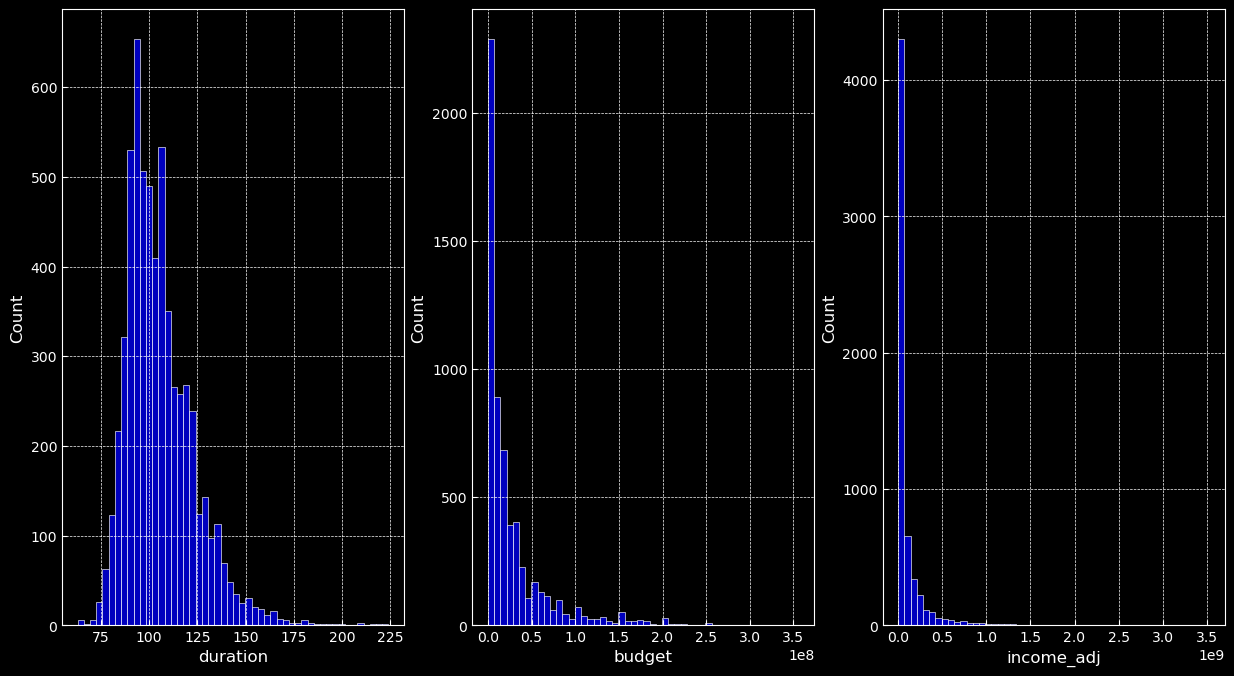

In [31]:
fg,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
sns.histplot(ax=ax[1],data=data_model,x="budget",bins=50,log_scale=False)
sns.histplot(ax=ax[0],data=data_model,x="duration",bins=50,log_scale=False)
sns.histplot(ax=ax[2],data=data_model,x="income_adj",bins=50,log_scale=False)

plt.show()

### There are values of income that are clearly wrong, should be treated in preprocessing

In [47]:
data_model[data_model["income_adj"]<100]

,duration,actors0,actors1,actors2,genre0,genre1,production_company,writer,date_published,budget_adj,budget,worlwide_gross_income,usa_gross_income,income_adj,title,language,year,country
4543,90,Leo Grillo,Katherine Heigl,Tom Sizemore,Crime,Drama,Zyzzyx LLC,John Penney,2006-02-24,2.688194e+06,2000000.0,30.0,$ 30,40.322917,Zyzzyx Rd,English,2006,USA
5464,102,Adam Beach,Tantoo Cardinal,Bradley Cooper,Drama,Drama,Older Than America,Georgina Lightning,2012-02-09,1.258552e+06,1000000.0,32.0,1000000.0,40.273661,Segreti dal passato,English,2008,USA
8069,92,Rodrigo De la Serna,Ernesto Suarez,Elisa Carricajo,Drama,Drama,Gema Films,Francisco Varone,2016-01-07,7.431134e+05,650000.0,17.0,650000.0,19.435273,Camino a La Paz,Spanish,2015,Argentina
8293,79,David Aboussafy,Laurette Flores,Aleyda Gallardo,Horror,Horror,Cinenauta,Lex Ortega,2018-10-26,8.002759e+03,7000.0,74.0,7000.0,84.600598,Atroz (Atrocious),Spanish,2015,Mexico


### Evolution of budget thor

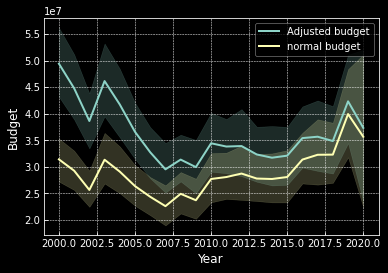

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(data=data_model,x="year",y="budget_adj",label="Adjusted budget")
sns.lineplot(data=data_model,x="year",y="budget",label="normal budget")
plt.ylabel("Budget")
plt.xlabel("Year")
plt.show()

### Relationship between numerical columns

In [16]:
income_corr = data_model[["income_adj","budget_adj","duration"]].corr()

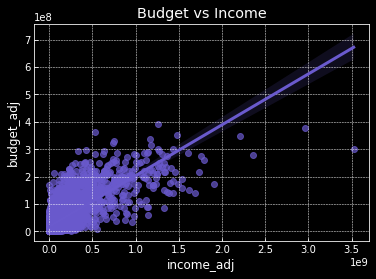

Pearson correlation: 0.7710119443613949


In [17]:
sns.regplot(x=data_model["income_adj"],y=data_model["budget_adj"],scatter_kws={"alpha":0.7},color="slateblue")
plt.title("Budget vs Income")
sns.violinplot()
plt.show()
print(f"Pearson correlation: {income_corr.values[0,1]}")

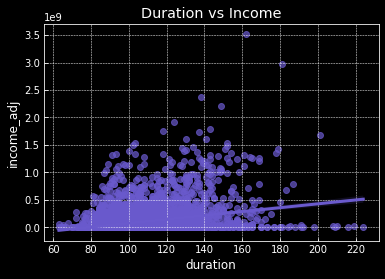

Pearson correlation: 0.29605300089755493


In [18]:
sns.regplot(x=data_model["duration"],y=data_model["income_adj"],scatter_kws={"alpha":0.7},color="slateblue")
plt.title("Duration vs Income")
plt.show()
print(f"Pearson correlation: {income_corr.values[0,2]}")

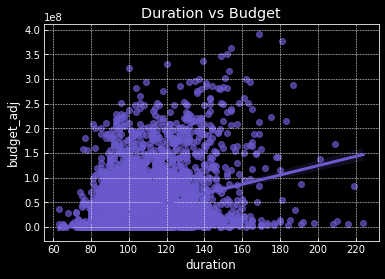

Pearson correlation: 0.3296635652474226


In [19]:
sns.regplot(x=data_model["duration"],y=data_model["budget_adj"],scatter_kws={"alpha":0.7},color="slateblue")
plt.title("Duration vs Budget")
plt.show()
print(f"Pearson correlation: {income_corr.values[1,2]}")

In [49]:
labels = pd.cut(data_model["income_adj"],5,labels=False)


In [ ]:
data_model["year"] = pd.to_datetime(data_model["date_published"]).dt.year
data_model["month"] = pd.to_datetime(data_model["date_published"]).dt.month
data_model["day"] = pd.to_datetime(data_model["date_published"]).dt.day

#### Behavior of income depending on month, day and day of the week

In [52]:
data_model["year"] = pd.to_datetime(data_model["date_published"]).dt.year
data_model["month"] = pd.to_datetime(data_model["date_published"]).dt.month
data_model["day"] = pd.to_datetime(data_model["date_published"]).dt.day

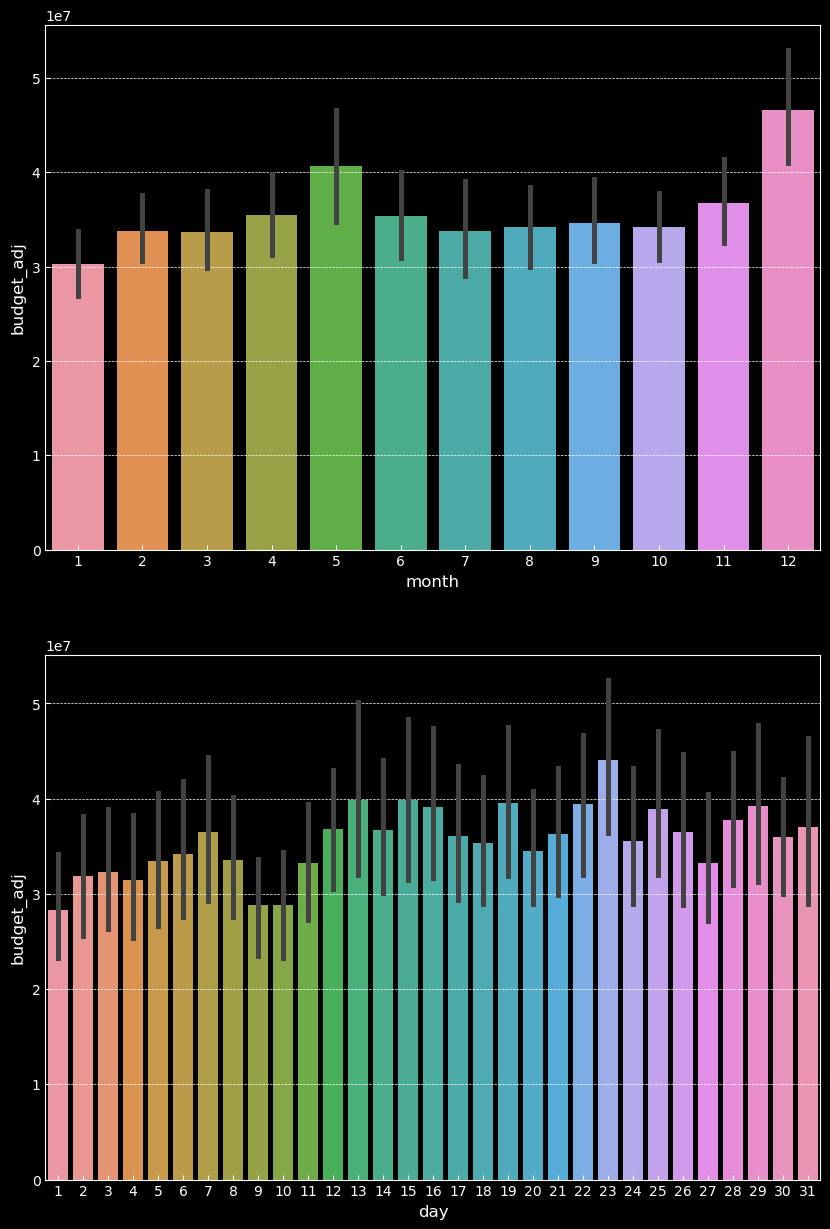

In [53]:
fig,ax = plt.subplots(2,1,figsize=(10,15))
sns.barplot(ax=ax[0],y=data_model.budget_adj,x=data_model.month)
sns.barplot(ax=ax[1],y=data_model.budget_adj,x=data_model.day)
plt.show()

In [54]:
data_model["week_day"] = pd.to_datetime(data_model["date_published"]).dt.dayofweek

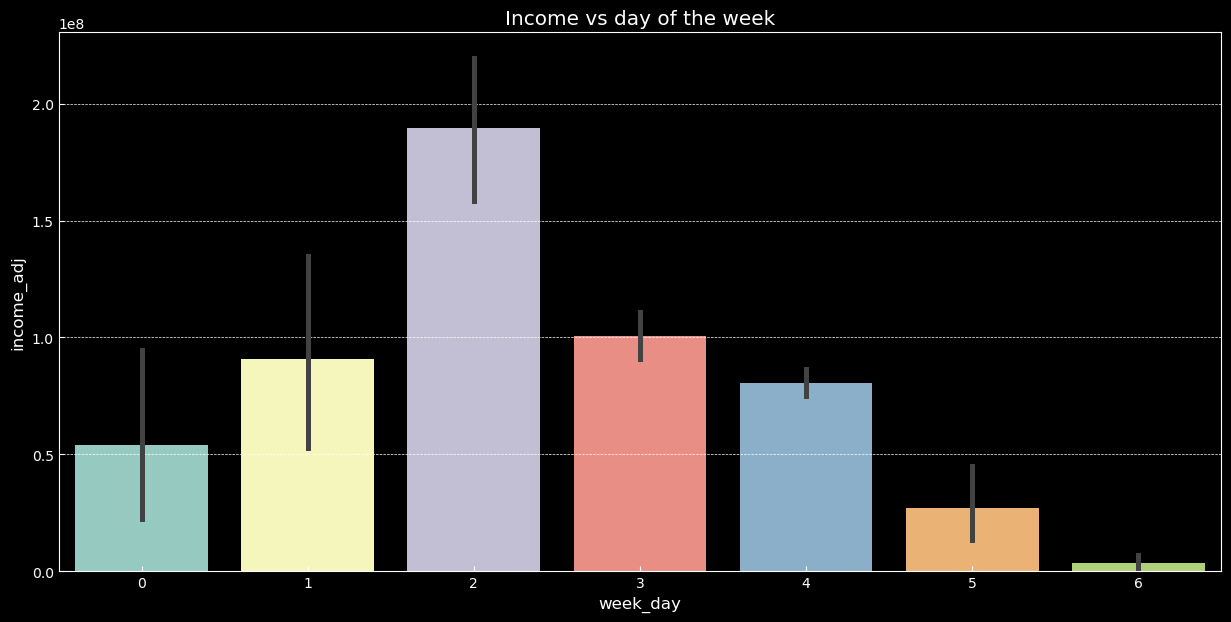

In [55]:
_,ax = plt.subplots(figsize=(15,7))
sns.barplot(ax=ax,x=data_model["week_day"],y=data_model["income_adj"])
ax.set_title("Income vs day of the week")
plt.show()